In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
import numpy as np
# Load datasetd
dataset = load_breast_cancer()
# Split data into train-test pools 
train, test, train_labels, test_labels = train_test_split(dataset['data'],
                                                          dataset['target'],
                                                          test_size=0.33)
# Train model 
logregr = LogisticRegression().fit(train, train_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
#Rename, listify 
actuals = list(test_labels)
# Predict probablities of test data [0,1]
scores = list(logregr.predict_proba(test)[:,1])
# Equivalently
import math
def sigmoid(x): 
    return 1 / (1 + math.exp(-x))
scores = [sigmoid(logregr.coef_@test_i + logregr.intercept_) for test_i in test]

In [16]:
# Predict binary outcomes (0,1)
predictions = list(logregr.predict(test))
# Equivalently 
predictions = [1 if s>0.5 else 0 for s in scores]

In [17]:
print("Accuracy = %.3f" % (sum([p==a for p, a in zip(predictions, actuals)])/len(predictions)))


Accuracy = 0.941


In [18]:
import collections
ConfusionMatrix = collections.namedtuple('conf', ['tp','fp','tn','fn']) 

In [19]:
 def calc_ConfusionMatrix(actuals, scores, threshold=0.5, positive_label=1):
    tp=fp=tn=fn=0
    bool_actuals = [act==positive_label for act in actuals]
    for truth, score in zip(bool_actuals, scores):
        if score > threshold:                      # predicted positive 
            if truth:                              # actually positive 
                tp += 1
            else:                                  # actually negative              
                fp += 1          
        else:                                      # predicted negative 
            if not truth:                          # actually negative 
                tn += 1                          
            else:                                  # actually positive 
                fn += 1
    return ConfusionMatrix(tp, fp, tn, fn)

In [20]:
def ACC(conf_mtrx):
    return (conf_mtrx.tp + conf_mtrx.tn) / (conf_mtrx.fp + conf_mtrx.tn + conf_mtrx.tp + conf_mtrx.fn)

In [21]:
def FPR(conf_mtrx):
    return conf_mtrx.fp / (conf_mtrx.fp + conf_mtrx.tn) if (conf_mtrx.fp + conf_mtrx.tn)!=0 else 0
def TPR(conf_mtrx):
    return conf_mtrx.tp / (conf_mtrx.tp + conf_mtrx.fn) if (conf_mtrx.tp + conf_mtrx.fn)!=0 else 0

In [61]:
def apply(actuals, scores, **fxns):
    # generate thresholds over score domain 
    low = min(scores)
    high = max(scores)
    step = (abs(low) + abs(high)) / 1000
    thresholds = np.arange(low-step, high+step, step)
    # calculate confusion matrices for all thresholds
    confusionMatrices = []
    for threshold in thresholds:
        confusionMatrices.append(calc_ConfusionMatrix(actuals, scores, threshold))
    # apply functions to confusion matrices 
    results = {fname:list(map(fxn, confusionMatrices)) for fname, fxn in fxns.items()}
    results["THR"] = thresholds
    return results

In [53]:
acc = apply(actuals,  scores, ACC=ACC)


In [77]:
def ROC(actuals, scores):
    return apply(actuals, scores, FPR=FPR, TPR=TPR)

cor = ROC(actuals, scores)
cor = list(cor.values())
cor1 = cor[0]
cor2 = cor[1]

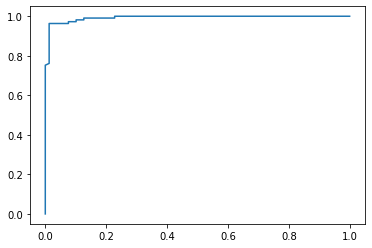

In [78]:
import matplotlib
from matplotlib import pyplot
matplotlib.pyplot.plot(cor1, cor2)